In [1]:
import pandas as pd 
import numpy as np
from functools import lru_cache
import os
from tqdm import tqdm

In [4]:
sasrec_session_candidates_path = '/root/autodl-tmp/xiaolong/WorkSpace/Amazon-KDDCUP-23/candidates/SASRec_Next/kdd_cup_2023/2023-04-01-14-13-51.parquet'
co_graph_item_candidates_path = '/root/autodl-tmp/huangxu/Amazon-KDDCUP-23/co-occurrence_graph/item_candidates.ftr'
retromae_session_candidates_path = '/root/autodl-tmp/xiaolong/WorkSpace/Amazon-KDDCUP-23/candidates/retromae_UK_valid_prediction.parquet'
valid_inter_feat_path = '../data_for_recstudio/all_task_1_valid_inter_feat.csv'
valid_sessions_path = '/root/autodl-tmp/xiaolong/WorkSpace/Amazon-KDDCUP-23/data_for_recstudio/all_task_1_valid_sessions.csv'
product_data_path = '../raw_data/products_train.csv'
roberta_session_candidates_path = '/root/autodl-tmp/xiaolong/WorkSpace/Amazon-KDDCUP-23/text_method/valid_results/valid_prediction.parquet'

In [5]:
@lru_cache(maxsize=1)
def read_valid_sessions():
    return pd.read_csv(valid_sessions_path)

@lru_cache(maxsize=1)
def read_sasrec_session_candidates():
    return pd.read_parquet(sasrec_session_candidates_path, engine='pyarrow')

@lru_cache(maxsize=1)
def read_retromae_session_candidates():
    return pd.read_parquet(retromae_session_candidates_path, engine='pyarrow')

@lru_cache(maxsize=1)
def read_co_graph_item_candidates():
    return pd.read_feather(co_graph_item_candidates_path)

@lru_cache(maxsize=1)
def read_product_data():
    return pd.read_csv(product_data_path)

@lru_cache(maxsize=1)
def read_roberta_session_candidates():
    return pd.read_parquet(roberta_session_candidates_path, engine='pyarrow')

In [6]:
valid_sessions = read_valid_sessions()
len(valid_sessions)

361581

In [7]:
roberta_predictions = read_roberta_session_candidates()
len(roberta_predictions)

361581

In [8]:
from collections import Counter
rank_counter = Counter()

In [11]:
for i in tqdm(range(len(valid_sessions))):
    ground_truth = valid_sessions.iloc[i]['next_item']
    predictions = roberta_predictions.iloc[i]['next_item_prediction']
    rank = 150
    for j, x in enumerate(predictions):
        if x == ground_truth:
            rank = j + 1
            break
    rank_counter[rank] += 1

100%|██████████| 361581/361581 [00:39<00:00, 9185.72it/s]


In [12]:
import matplotlib.pyplot as plt
import numpy as np
x = list(range(1, 101))
y = [rank_counter[i]  for i in x]
x.append(150), y.append(rank_counter[150])
x = np.array(x)
y = np.array(y)
x, y

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 150]),
 array([ 15700,  21131,  17487,  13698,  10812,   9012,   7497,   6451,
          5792,   5192,   4482,   4085,   3792,   3614,   3268,   3212,
          2873,   2774,   2534,   2415,   2271,   2152,   2056,   2064,
          1883,   1832,   1717,   1674,   1601,   1627,   1518,   1433,
          1390,   1327,   1226,   1236,   1181,   1142,   1149,   1110,
          1106,   1014,   1009,   1022,    937,    974,   1007,    93

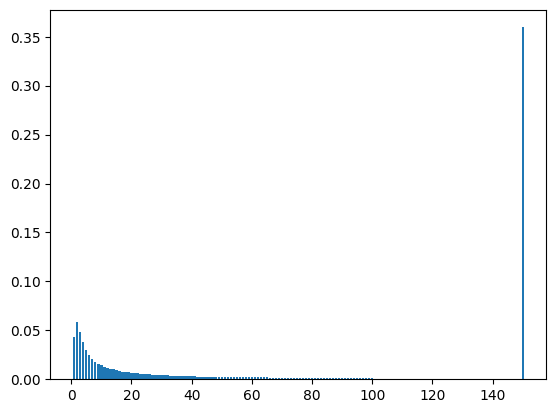

In [13]:
y2 = np.array(y) / len(roberta_predictions)
plt.bar(x, y2)
plt.show()